<a href="https://colab.research.google.com/github/doldolMac/homework_CV/blob/master/HW2(edit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
! git clone https://github.com/doldolMac/homework_CV

fatal: destination path 'homework_CV' already exists and is not an empty directory.


In [158]:
# 이미지 및 크기 정보 불러오기
from skimage import io
from skimage import color
from PIL import Image

img_1_ori = io.imread('/content/homework_CV/Telescope.jpg')
img_2_ori = io.imread('/content/homework_CV/Telescope_rot.jpg')

img_1 = color.rgb2gray(img_1_ori)
img_2 = color.rgb2gray(img_2_ori)

img_1_copy = img_1.copy()
img_2_copy = img_2.copy()

height = img_1.shape[0]
width = img_1.shape[1]

FileNotFoundError: ignored

In [0]:
# Gaussian 커널 형성
import numpy as np

def gaussian_kernel(size, sigma=1):
  size = int(size) //2
  x, y = np.mgrid[-size:size+1, -size:size+1]
  normal =1 / (2.0 * np.pi * sigma**2)
  gaussian = np.exp(-((x**2 + y**2) / (2.0*sigma**2) * normal))
  return gaussian

In [0]:
# Gradient 생성

from scipy import signal
from scipy import ndimage

# Sobel Filters

def sobel_filters(img):

  kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
  kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

  Ix = ndimage.filters.convolve(img,kernel_x) # x축 방향 기울기
  Iy = ndimage.filters.convolve(img,kernel_y) # y축 방향 기울기

  G = np.hypot(Ix, Iy)  #Gradient 값
  G = G / G.max()*255   #Gradient Normalization
  theta = (np.arctan2(Iy, Ix))*180/np.pi  #Theta값

  Ixx = Ix**2
  Ixy = Iy*Ix
  Iyy = Iy**2

  return (G, theta, Ixx, Iyy, Ixy)

G, theta, Ixx, Iyy, Ixy = sobel_filters(img_1)

# Window에 Gaussian을 입힌다

Gaussian_Kernel = gaussian_kernel(5, 1.4)
Gaussian_Ixx = signal.convolve2d(Ixx, Gaussian_Kernel, mode='same')
Gaussian_Iyy = signal.convolve2d(Iyy, Gaussian_Kernel, mode='same')
Gaussian_Ixy = signal.convolve2d(Ixy, Gaussian_Kernel, mode='same')

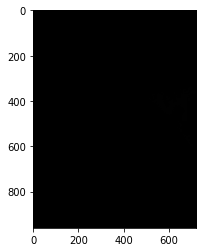

In [0]:
# 이미지에 Detected Corner 표시

from matplotlib import pyplot as plt

height = img_1.shape[0]
width = img_1.shape[1]
k = 0.04
window_size = 5
offset = window_size // 2
list_x = []
list_y = []

M = np.zeros((height, width), np.float32)

def HarrisCornerDetector(Window_size, height, width, offset):

  # 엣지가 아닌 코너점 검출
  for y in range(window_size, height-window_size):
    for x in range(window_size, width-window_size):
      Sxx = np.sum(Gaussian_Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
      Syy = np.sum(Gaussian_Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
      Sxy = np.sum(Gaussian_Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
    
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy
      M[y,x] = det - k*(trace**2)

  thresh = 0.9 * M.max()

  for y in range(window_size, height-window_size):
    for x in range(window_size, width-window_size):
      Sxx = np.sum(Gaussian_Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
      Syy = np.sum(Gaussian_Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
      Sxy = np.sum(Gaussian_Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
    
      det = (Sxx * Syy) - (Sxy**2)
      trace = Sxx + Syy
      M[y,x] = det - k*(trace**2)

      if M[y,x] > thresh:
        list_y.append(y)
        list_x.append(x)

  img_1_copy[M > thresh] = 255
  img_corner = img_1_copy
  
  return img_corner, list_y, list_x

img_corner, list_y, list_x = HarrisCornerDetector(Window_size, height, width, offset)

plt.imshow(img_corner, cmap='gray')
plt.show()


In [0]:
Window= np.zeros((16,16), np.float32)
gaussianWindow= np.zeros((16,16), np.float32)
Window_list = []
gaussianWindow_list=[]

for itr in range(0, len(list_y)):
    gradKey = theta[list_y[itr], list_x[itr]]
    for i in range(0,16):
      for j in range(0,16):
        Window[i,j] = theta[list_y[itr]-8+i, list_x[itr]-8+j]-gradKey+360
    Window_list.append(Window)
    gaussianWindow = ndimage.filters.convolve(Window,gaussian_kernel(16,1))
    gaussianWindow_list.append(gaussianWindow)

In [0]:
import numpy as np

# sub-window 정의
Subwindow1 = np.zeros((4,4), np.float32)
Subwindow2 = np.zeros((4,4), np.float32)
Subwindow3 = np.zeros((4,4), np.float32)
Subwindow4 = np.zeros((4,4), np.float32)
Subwindow5 = np.zeros((4,4), np.float32)
Subwindow6 = np.zeros((4,4), np.float32)
Subwindow7 = np.zeros((4,4), np.float32)
Subwindow8 = np.zeros((4,4), np.float32)
Subwindow9 = np.zeros((4,4), np.float32)
Subwindow10 = np.zeros((4,4), np.float32)
Subwindow11 = np.zeros((4,4), np.float32)
Subwindow12 = np.zeros((4,4), np.float32)
Subwindow13 = np.zeros((4,4), np.float32)
Subwindow14 = np.zeros((4,4), np.float32)
Subwindow15 = np.zeros((4,4), np.float32)
Subwindow16 = np.zeros((4,4), np.float32)
Subwindow_list1 = []
Subwindow_list2 = []
Subwindow_list3 = []
Subwindow_list4 = []
Subwindow_list5 = []
Subwindow_list6 = []
Subwindow_list7 = []
Subwindow_list8 = []
Subwindow_list9 = []
Subwindow_list10 = []
Subwindow_list11 = []
Subwindow_list12 = []
Subwindow_list13 = []
Subwindow_list14 = []
Subwindow_list15 = []
Subwindow_list16 = []


#for i in range(0, len(Window_list)):
for i in range(0,len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      Subwindow1[itr, itr2] = Window_list[i][itr, itr2]
      Subwindow2[itr, itr2] = Window_list[i][itr, itr2+4]
      Subwindow3[itr, itr2] = Window_list[i][itr, itr2+8]
      Subwindow4[itr, itr2] = Window_list[i][itr, itr2+12]
      Subwindow5[itr, itr2] = Window_list[i][itr+4, itr2]
      Subwindow6[itr, itr2] = Window_list[i][itr+4, itr2+4]
      Subwindow7[itr, itr2] = Window_list[i][itr+4, itr2+8]
      Subwindow8[itr, itr2] = Window_list[i][itr+4, itr2+12]
      Subwindow9[itr, itr2] = Window_list[i][itr+8, itr2]
      Subwindow10[itr, itr2] = Window_list[i][itr+8, itr2+4]
      Subwindow11[itr, itr2] = Window_list[i][itr+8, itr2+8]
      Subwindow12[itr, itr2] = Window_list[i][itr+8, itr2+12]
      Subwindow13[itr, itr2] = Window_list[i][itr+12, itr2]
      Subwindow14[itr, itr2] = Window_list[i][itr+12, itr2+4]
      Subwindow15[itr, itr2] = Window_list[i][itr+12, itr2+8]
      Subwindow16[itr, itr2] = Window_list[i][itr+12, itr2+12]
  Subwindow_list1.append(Subwindow1)
  Subwindow_list2.append(Subwindow2)
  Subwindow_list3.append(Subwindow3)
  Subwindow_list4.append(Subwindow4)
  Subwindow_list5.append(Subwindow5)
  Subwindow_list6.append(Subwindow6)
  Subwindow_list7.append(Subwindow7)
  Subwindow_list8.append(Subwindow8)
  Subwindow_list9.append(Subwindow9)
  Subwindow_list10.append(Subwindow10)
  Subwindow_list11.append(Subwindow11)
  Subwindow_list12.append(Subwindow12)
  Subwindow_list13.append(Subwindow13)
  Subwindow_list14.append(Subwindow14)
  Subwindow_list15.append(Subwindow15)
  Subwindow_list16.append(Subwindow16)
print(len(Subwindow_list1))

3


In [0]:
# histogram of subregion

In [0]:
# 8 bins

bin1 = []
bin2 = []
bin3 = []
bin4 = []
bin5 = []
bin6 = []
bin7 = []
bin8 = []

Subwindow_bin1 = []
Subwindow_bin2 = []
Subwindow_bin3 = []
Subwindow_bin4 = []
Subwindow_bin5 = []
Subwindow_bin6 = []
Subwindow_bin7 = []
Subwindow_bin8 = []
Subwindow_bin9 = []
Subwindow_bin10 = []
Subwindow_bin11 = []
Subwindow_bin12 = []
Subwindow_bin13 = []
Subwindow_bin14 = []
Subwindow_bin15 = []
Subwindow_bin16 = []

Bin_Subwindow1 = []
Bin_Subwindow2 = []
Bin_Subwindow3 = []
Bin_Subwindow4 = []
Bin_Subwindow5 = []
Bin_Subwindow6 = []
Bin_Subwindow7 = []
Bin_Subwindow8 = []
Bin_Subwindow9 = []
Bin_Subwindow10 = []
Bin_Subwindow11 = []
Bin_Subwindow12 = []
Bin_Subwindow13 = []
Bin_Subwindow14 = []
Bin_Subwindow15 = []
Bin_Subwindow16 = []

Bin_Subwindows = []

i=1
for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list1[i][itr,itr2] > 0 and Subwindow_list1[i][itr,itr2] <45:
          bin1.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 45 and Subwindow_list1[i][itr,itr2] <90:
          bin2.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 90 and Subwindow_list1[i][itr,itr2] <135:
          bin3.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 135 and Subwindow_list1[i][itr,itr2] <180:
          bin4.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 180 and Subwindow_list1[i][itr,itr2] <225:
          bin5.append(Subwindow_list1[i][itr,itr2])                                                                                       
      elif Subwindow_list1[i][itr,itr2] > 225 and Subwindow_list1[i][itr,itr2] <270:
          bin6.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 270 and Subwindow_list1[i][itr,itr2] <315:
          bin7.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list1[i][itr,itr2] > 315 and Subwindow_list1[i][itr,itr2] <360:
          bin8.append(Subwindow_list1[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow1.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow1)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list2[i][itr,itr2] > 0 and Subwindow_list2[i][itr,itr2] <45:
          bin1.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 45 and Subwindow_list2[i][itr,itr2] <90:
          bin2.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 90 and Subwindow_list2[i][itr,itr2] <135:
          bin3.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 135 and Subwindow_list2[i][itr,itr2] <180:
          bin4.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 180 and Subwindow_list2[i][itr,itr2] <225:
          bin5.append(Subwindow_list1[i][itr,itr2])                                                                                       
      elif Subwindow_list2[i][itr,itr2] > 225 and Subwindow_list2[i][itr,itr2] <270:
          bin6.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 270 and Subwindow_list2[i][itr,itr2] <315:
          bin7.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list2[i][itr,itr2] > 315 and Subwindow_list2[i][itr,itr2] <360:
          bin8.append(Subwindow_list1[i][itr,itr2])
    Subwindow_bin1.append(len(bin1))
    Subwindow_bin2.append(len(bin2))
    Subwindow_bin3.append(len(bin3))
    Subwindow_bin4.append(len(bin4))
    Subwindow_bin5.append(len(bin5))
    Subwindow_bin6.append(len(bin6))
    Subwindow_bin7.append(len(bin7))
    Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow2.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow2)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list3[i][itr,itr2] > 0 and Subwindow_list3[i][itr,itr2] <45:
          bin1.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 45 and Subwindow_list3[i][itr,itr2] <90:
          bin2.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 90 and Subwindow_list3[i][itr,itr2] <135:
          bin3.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 135 and Subwindow_list3[i][itr,itr2] <180:
          bin4.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 180 and Subwindow_list3[i][itr,itr2] <225:
          bin5.append(Subwindow_list3[i][itr,itr2])                                                                                       
      elif Subwindow_list3[i][itr,itr2] > 225 and Subwindow_list3[i][itr,itr2] <270:
          bin6.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 270 and Subwindow_list3[i][itr,itr2] <315:
          bin7.append(Subwindow_list3[i][itr,itr2])
      elif Subwindow_list3[i][itr,itr2] > 315 and Subwindow_list3[i][itr,itr2] <360:
          bin8.append(Subwindow_list3[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow3.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow3)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list4[i][itr,itr2] > 0 and Subwindow_list4[i][itr,itr2] <45:
          bin1.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 45 and Subwindow_list4[i][itr,itr2] <90:
          bin2.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 90 and Subwindow_list4[i][itr,itr2] <135:
          bin3.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 135 and Subwindow_list4[i][itr,itr2] <180:
          bin4.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 180 and Subwindow_list4[i][itr,itr2] <225:
          bin5.append(Subwindow_list4[i][itr,itr2])                                                                                       
      elif Subwindow_list4[i][itr,itr2] > 225 and Subwindow_list4[i][itr,itr2] <270:
          bin6.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 270 and Subwindow_list4[i][itr,itr2] <315:
          bin7.append(Subwindow_list4[i][itr,itr2])
      elif Subwindow_list4[i][itr,itr2] > 315 and Subwindow_list4[i][itr,itr2] <360:
          bin8.append(Subwindow_list4[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow4.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow4)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list5[i][itr,itr2] > 0 and Subwindow_list5[i][itr,itr2] <45:
          bin1.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 45 and Subwindow_list5[i][itr,itr2] <90:
          bin2.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 90 and Subwindow_list5[i][itr,itr2] <135:
          bin3.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 135 and Subwindow_list5[i][itr,itr2] <180:
          bin4.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 180 and Subwindow_list5[i][itr,itr2] <225:
          bin5.append(Subwindow_list5[i][itr,itr2])                                                                                       
      elif Subwindow_list5[i][itr,itr2] > 225 and Subwindow_list5[i][itr,itr2] <270:
          bin6.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 270 and Subwindow_list5[i][itr,itr2] <315:
          bin7.append(Subwindow_list5[i][itr,itr2])
      elif Subwindow_list5[i][itr,itr2] > 315 and Subwindow_list5[i][itr,itr2] <360:
          bin8.append(Subwindow_list5[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow5.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow5)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list6[i][itr,itr2] > 0 and Subwindow_list6[i][itr,itr2] <45:
          bin1.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 45 and Subwindow_list6[i][itr,itr2] <90:
          bin2.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 90 and Subwindow_list6[i][itr,itr2] <135:
          bin3.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 135 and Subwindow_list6[i][itr,itr2] <180:
          bin4.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 180 and Subwindow_list6[i][itr,itr2] <225:
          bin5.append(Subwindow_list6[i][itr,itr2])                                                                                       
      elif Subwindow_list6[i][itr,itr2] > 225 and Subwindow_list6[i][itr,itr2] <270:
          bin6.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 270 and Subwindow_list6[i][itr,itr2] <315:
          bin7.append(Subwindow_list6[i][itr,itr2])
      elif Subwindow_list6[i][itr,itr2] > 315 and Subwindow_list6[i][itr,itr2] <360:
          bin8.append(Subwindow_list6[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow6.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow6)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list7[i][itr,itr2] > 0 and Subwindow_list7[i][itr,itr2] <45:
          bin1.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 45 and Subwindow_list7[i][itr,itr2] <90:
          bin2.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 90 and Subwindow_list7[i][itr,itr2] <135:
          bin3.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 135 and Subwindow_list7[i][itr,itr2] <180:
          bin4.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 180 and Subwindow_list7[i][itr,itr2] <225:
          bin5.append(Subwindow_list7[i][itr,itr2])                                                                                       
      elif Subwindow_list7[i][itr,itr2] > 225 and Subwindow_list7[i][itr,itr2] <270:
          bin6.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 270 and Subwindow_list7[i][itr,itr2] <315:
          bin7.append(Subwindow_list7[i][itr,itr2])
      elif Subwindow_list7[i][itr,itr2] > 315 and Subwindow_list7[i][itr,itr2] <360:
          bin8.append(Subwindow_list7[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow7.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow7)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list8[i][itr,itr2] > 0 and Subwindow_list8[i][itr,itr2] <45:
          bin1.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 45 and Subwindow_list8[i][itr,itr2] <90:
          bin2.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 90 and Subwindow_list8[i][itr,itr2] <135:
          bin3.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 135 and Subwindow_list8[i][itr,itr2] <180:
          bin4.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 180 and Subwindow_list8[i][itr,itr2] <225:
          bin5.append(Subwindow_list8[i][itr,itr2])                                                                                       
      elif Subwindow_list8[i][itr,itr2] > 225 and Subwindow_list8[i][itr,itr2] <270:
          bin6.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 270 and Subwindow_list8[i][itr,itr2] <315:
          bin7.append(Subwindow_list8[i][itr,itr2])
      elif Subwindow_list8[i][itr,itr2] > 315 and Subwindow_list8[i][itr,itr2] <360:
          bin8.append(Subwindow_list8[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow8.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow8)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list9[i][itr,itr2] > 0 and Subwindow_list9[i][itr,itr2] <45:
          bin1.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 45 and Subwindow_list9[i][itr,itr2] <90:
          bin2.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 90 and Subwindow_list9[i][itr,itr2] <135:
          bin3.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 135 and Subwindow_list9[i][itr,itr2] <180:
          bin4.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 180 and Subwindow_list9[i][itr,itr2] <225:
          bin5.append(Subwindow_list9[i][itr,itr2])                                                                                       
      elif Subwindow_list9[i][itr,itr2] > 225 and Subwindow_list9[i][itr,itr2] <270:
          bin6.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 270 and Subwindow_list9[i][itr,itr2] <315:
          bin7.append(Subwindow_list9[i][itr,itr2])
      elif Subwindow_list9[i][itr,itr2] > 315 and Subwindow_list9[i][itr,itr2] <360:
          bin8.append(Subwindow_list9[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow9.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow9)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list10[i][itr,itr2] > 0 and Subwindow_list10[i][itr,itr2] <45:
          bin1.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 45 and Subwindow_list10[i][itr,itr2] <90:
          bin2.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 90 and Subwindow_list10[i][itr,itr2] <135:
          bin3.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 135 and Subwindow_list10[i][itr,itr2] <180:
          bin4.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 180 and Subwindow_list10[i][itr,itr2] <225:
          bin5.append(Subwindow_list10[i][itr,itr2])                                                                                       
      elif Subwindow_list10[i][itr,itr2] > 225 and Subwindow_list10[i][itr,itr2] <270:
          bin6.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 270 and Subwindow_list10[i][itr,itr2] <315:
          bin7.append(Subwindow_list10[i][itr,itr2])
      elif Subwindow_list10[i][itr,itr2] > 315 and Subwindow_list10[i][itr,itr2] <360:
          bin8.append(Subwindow_list10[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow10.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow10)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list11[i][itr,itr2] > 0 and Subwindow_list11[i][itr,itr2] <45:
          bin1.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 45 and Subwindow_list11[i][itr,itr2] <90:
          bin2.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 90 and Subwindow_list11[i][itr,itr2] <135:
          bin3.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 135 and Subwindow_list11[i][itr,itr2] <180:
          bin4.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 180 and Subwindow_list11[i][itr,itr2] <225:
          bin5.append(Subwindow_list11[i][itr,itr2])                                                                                       
      elif Subwindow_list11[i][itr,itr2] > 225 and Subwindow_list11[i][itr,itr2] <270:
          bin6.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 270 and Subwindow_list11[i][itr,itr2] <315:
          bin7.append(Subwindow_list11[i][itr,itr2])
      elif Subwindow_list11[i][itr,itr2] > 315 and Subwindow_list11[i][itr,itr2] <360:
          bin8.append(Subwindow_list1[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow11.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow11)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list12[i][itr,itr2] > 0 and Subwindow_list12[i][itr,itr2] <45:
          bin1.append(Subwindow_list12[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 45 and Subwindow_list12[i][itr,itr2] <90:
          bin2.append(Subwindow_list12[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 90 and Subwindow_list12[i][itr,itr2] <135:
          bin3.append(Subwindow_list1[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 135 and Subwindow_list12[i][itr,itr2] <180:
          bin4.append(Subwindow_list12[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 180 and Subwindow_list12[i][itr,itr2] <225:
          bin5.append(Subwindow_list12[i][itr,itr2])                                                                                       
      elif Subwindow_list12[i][itr,itr2] > 225 and Subwindow_list12[i][itr,itr2] <270:
          bin6.append(Subwindow_list12[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 270 and Subwindow_list12[i][itr,itr2] <315:
          bin7.append(Subwindow_list12[i][itr,itr2])
      elif Subwindow_list12[i][itr,itr2] > 315 and Subwindow_list12[i][itr,itr2] <360:
          bin8.append(Subwindow_list12[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow12.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow12)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list13[i][itr,itr2] > 0 and Subwindow_list13[i][itr,itr2] <45:
          bin1.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 45 and Subwindow_list13[i][itr,itr2] <90:
          bin2.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 90 and Subwindow_list13[i][itr,itr2] <135:
          bin3.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 135 and Subwindow_list13[i][itr,itr2] <180:
          bin4.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 180 and Subwindow_list13[i][itr,itr2] <225:
          bin5.append(Subwindow_list13[i][itr,itr2])                                                                                       
      elif Subwindow_list13[i][itr,itr2] > 225 and Subwindow_list13[i][itr,itr2] <270:
          bin6.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 270 and Subwindow_list13[i][itr,itr2] <315:
          bin7.append(Subwindow_list13[i][itr,itr2])
      elif Subwindow_list13[i][itr,itr2] > 315 and Subwindow_list13[i][itr,itr2] <360:
          bin8.append(Subwindow_list13[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow13.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow13)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list14[i][itr,itr2] > 0 and Subwindow_list14[i][itr,itr2] <45:
          bin1.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 45 and Subwindow_list14[i][itr,itr2] <90:
          bin2.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 90 and Subwindow_list14[i][itr,itr2] <135:
          bin3.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 135 and Subwindow_list14[i][itr,itr2] <180:
          bin4.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 180 and Subwindow_list14[i][itr,itr2] <225:
          bin5.append(Subwindow_list14[i][itr,itr2])                                                                                       
      elif Subwindow_list14[i][itr,itr2] > 225 and Subwindow_list14[i][itr,itr2] <270:
          bin6.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 270 and Subwindow_list14[i][itr,itr2] <315:
          bin7.append(Subwindow_list14[i][itr,itr2])
      elif Subwindow_list14[i][itr,itr2] > 315 and Subwindow_list14[i][itr,itr2] <360:
          bin8.append(Subwindow_list14[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow14.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow14)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list15[i][itr,itr2] > 0 and Subwindow_list15[i][itr,itr2] <45:
          bin1.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 45 and Subwindow_list15[i][itr,itr2] <90:
          bin2.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 90 and Subwindow_list15[i][itr,itr2] <135:
          bin3.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 135 and Subwindow_list15[i][itr,itr2] <180:
          bin4.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 180 and Subwindow_list15[i][itr,itr2] <225:
          bin5.append(Subwindow_list15[i][itr,itr2])                                                                                       
      elif Subwindow_list15[i][itr,itr2] > 225 and Subwindow_list15[i][itr,itr2] <270:
          bin6.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 270 and Subwindow_list15[i][itr,itr2] <315:
          bin7.append(Subwindow_list15[i][itr,itr2])
      elif Subwindow_list15[i][itr,itr2] > 315 and Subwindow_list15[i][itr,itr2] <360:
          bin8.append(Subwindow_list15[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow15.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow15)

for i in range(0, len(Window_list)):
  for itr in range(0, 4):
    for itr2 in range(0, 4):
      if Subwindow_list16[i][itr,itr2] > 0 and Subwindow_list16[i][itr,itr2] <45:
          bin1.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 45 and Subwindow_list16[i][itr,itr2] <90:
          bin2.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 90 and Subwindow_list16[i][itr,itr2] <135:
          bin3.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 135 and Subwindow_list16[i][itr,itr2] <180:
          bin4.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 180 and Subwindow_list16[i][itr,itr2] <225:
          bin5.append(Subwindow_list16[i][itr,itr2])                                                                                       
      elif Subwindow_list16[i][itr,itr2] > 225 and Subwindow_list16[i][itr,itr2] <270:
          bin6.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 270 and Subwindow_list16[i][itr,itr2] <315:
          bin7.append(Subwindow_list16[i][itr,itr2])
      elif Subwindow_list16[i][itr,itr2] > 315 and Subwindow_list16[i][itr,itr2] <360:
          bin8.append(Subwindow_list16[i][itr,itr2])
  Subwindow_bin1.append(len(bin1))
  Subwindow_bin2.append(len(bin2))
  Subwindow_bin3.append(len(bin3))
  Subwindow_bin4.append(len(bin4))
  Subwindow_bin5.append(len(bin5))
  Subwindow_bin6.append(len(bin6))
  Subwindow_bin7.append(len(bin7))
  Subwindow_bin8.append(len(bin8))

for k in range(0, len(Window_list)):
  Bin_Subwindow = [Subwindow_bin1[k],Subwindow_bin2[k],Subwindow_bin3[k],Subwindow_bin4[k],Subwindow_bin5[k],Subwindow_bin6[k],Subwindow_bin7[k],Subwindow_bin8[k]]
  Bin_Subwindow16.append(Bin_Subwindow)
Bin_Subwindows.append(Bin_Subwindow16)

[[[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2, 4, 2, 0, 6], [0, 3, 3, 3, 6, 3, 0, 9]], [[0, 1, 1, 1, 2, 1, 0, 3], [0, 2, 2, 2,